In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', font_scale=1.5)

In [2]:
data = pd.read_csv('./Data/augmented_vg_sales.csv')

# How have the popularity of genres changed throughout different generations of gaming platforms?

In [3]:
console_data = data.loc[data.System == 'Console', ['Genre','Global_Sales', 'Generation']]
handheld_data = data.loc[data.System == 'Handheld', ['Genre','Global_Sales', 'Generation']]
PC_data = data.loc[data.System == 'PC', ['Genre','Global_Sales', 'Generation']]

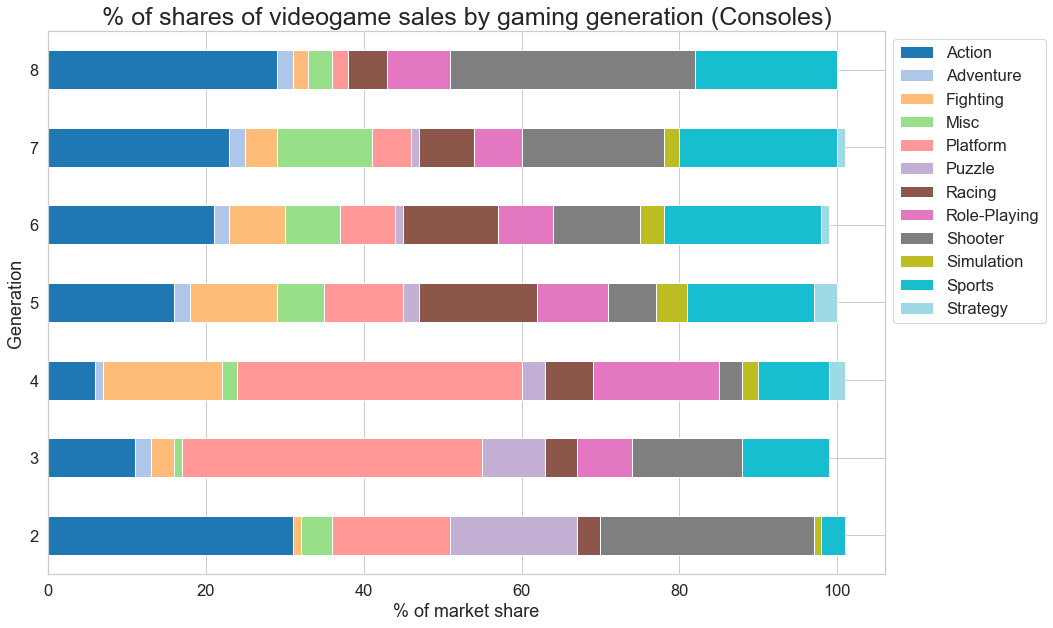

In [4]:
figsize=(15,10)
fontlabels = 20

df = console_data.groupby(['Genre', 'Generation']).Global_Sales.sum().unstack(-1)
ax = (100. * df / df.sum()).round(0).T.plot.barh(rot=0,stacked=True, figsize=figsize,colormap='tab20')

ax.set_title('% of shares of videogame sales by gaming generation (Consoles)',fontsize=25)
ax.set_xlabel('% of market share')
ax.legend(bbox_to_anchor=(1, 1), loc=2);

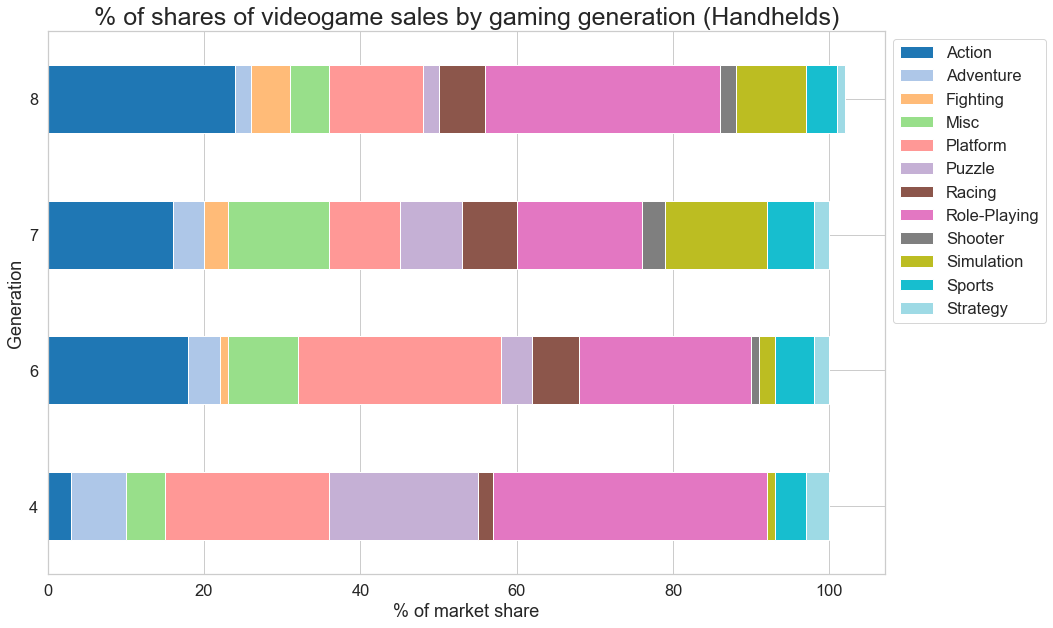

In [5]:
figsize=(15,10)
fontlabels = 20

df = handheld_data.groupby(['Genre', 'Generation']).Global_Sales.sum().unstack(-1)
ax = (100. * df / df.sum()).round(0).T.plot.barh(rot=0,stacked=True, figsize=figsize,colormap='tab20')

ax.set_title('% of shares of videogame sales by gaming generation (Handhelds)',fontsize=25)
ax.set_xlabel('% of market share')
ax.legend(bbox_to_anchor=(1, 1), loc=2);

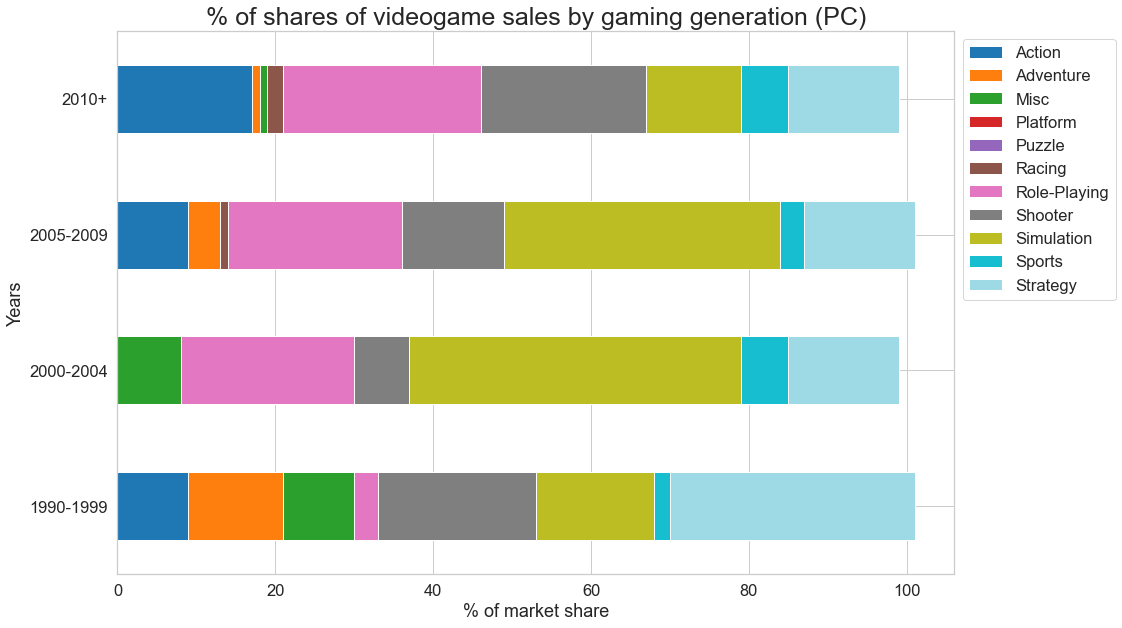

In [6]:
figsize = (15,10)
fontlabels = 20

df = PC_data.groupby(['Genre', 'Generation']).Global_Sales.sum().unstack(-1)
ax = (100. * df / df.sum()).round(0).T.plot.barh(rot=0,stacked=True, figsize=figsize,colormap='tab20')

ax.set_title('% of shares of videogame sales by gaming generation (PC)',fontsize=25)
ax.set_xlabel('% of market share')
ax.set_ylabel('Years')
ax.set_yticklabels(['1990-1999', '2000-2004', '2005-2009', '2010+'])
ax.legend(bbox_to_anchor=(1, 1), loc=2);

## How have videogame sales of platform manufacturers changed?

In [8]:
sales_data_yearly = data.groupby(['platform_creator', 'Year']).Global_Sales.sum().unstack().T

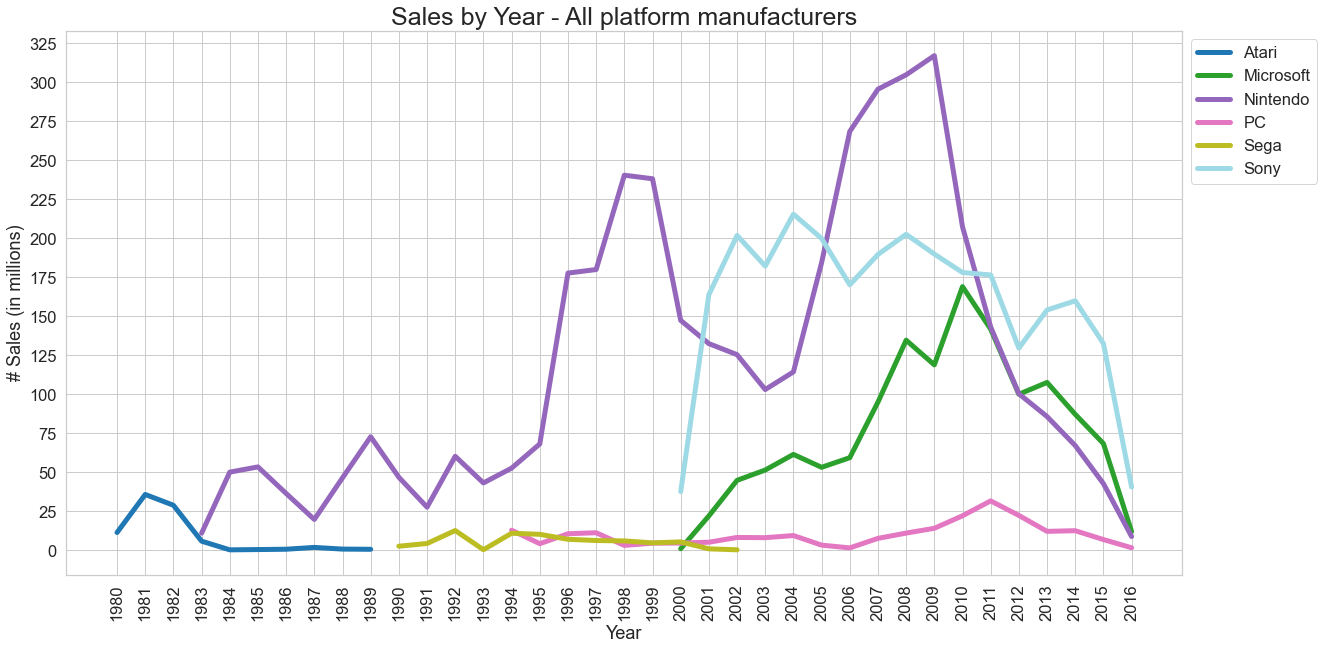

In [10]:
figsize = (20,10)
fontlabels = 20

ax = sales_data_yearly.plot(figsize=figsize,colormap='tab20',lw=5)

ax.set_title('Sales by Year - All platform manufacturers',fontsize=25)
ax.set_ylabel('# Sales (in millions)')
ax.set_yticks(range(0, 350,25))
ax.set_xticks([x for x in sales_data_yearly.index])
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
ax.legend(bbox_to_anchor=(1, 1), loc=2);

## What are the top 25 most prolific Publishers?

In [11]:
no_games_published = data.Publisher.value_counts().rename_axis('Publisher').rename('Titles_Published')
top_25 = no_games_published.head(25)
top_25.to_frame()

,Titles_Published
Publisher,
Electronic Arts,1149
Activision,771
Ubisoft,650
Nintendo,628
THQ,584
Sony Computer Entertainment,553
Namco Bandai Games,504
Konami Digital Entertainment,495
Sega,438


## Amongst these, which sell more games on average per title?

In [12]:
global_sales_publisher = data[data.Publisher.isin(top_25.index)].groupby('Publisher').Global_Sales.sum()

titles_sold_published = pd.concat([top_25, global_sales_publisher],axis=1)

titles_sold_published['sold_per_published_mils'] = (titles_sold_published.Global_Sales) / titles_sold_published.Titles_Published

In [13]:
titles_sold_published.sort_values(['sold_per_published_mils'], ascending=False)

,Titles_Published,Global_Sales,sold_per_published_mils
Nintendo,628,1780.42,2.835064
Microsoft Game Studios,140,243.15,1.736786
Take-Two Interactive,319,393.64,1.233981
LucasArts,74,84.00,1.135135
Sony Computer Entertainment,553,599.75,1.084539
Electronic Arts,1149,1082.79,0.942376
Activision,771,709.86,0.920700
Square Enix,182,142.21,0.781374
Capcom,249,193.50,0.777108
Eidos Interactive,124,93.04,0.750323


## Amongst these, which are the most consistent in terms of sales per published game?

In [14]:
data[data.Publisher.isin(top_25.index)].groupby('Publisher').Global_Sales.std().sort_values(ascending=True)

Publisher
Tecmo Koei                                0.268993
D3Publisher                               0.276983
Codemasters                               0.473292
Midway Games                              0.487510
Acclaim Entertainment                     0.497992
Namco Bandai Games                        0.554452
Disney Interactive Studios                0.563031
THQ                                       0.596745
Vivendi Games                             0.682667
Konami Digital Entertainment              0.749248
Sega                                      0.804965
Warner Bros. Interactive Entertainment    0.822172
Atari                                     0.823804
Square Enix                               0.899733
Capcom                                    0.974967
505 Games                                 1.004500
Eidos Interactive                         1.041534
Ubisoft                                   1.060668
Electronic Arts                           1.092024
LucasArts            